In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

import numpy as np
import torch
import matplotlib.pyplot as plt

from drawing import draw_window, visualize_score_map
from image import get_image_tensor, get_numpy_image
from shape import Window, Position
from roi_align import RoIAlignFeatureExtractor
from matcher import CnnMatcher, Window
from image import load_image
from feature_extractor import CNN, ReCNN, FeatureExtractor
from candidates import Candidates
from scorer import CosineSimilarityScorer, Scorer
from shape.basic import Size
from utils.timer import timer

Text(0.5, 1.0, 'template')

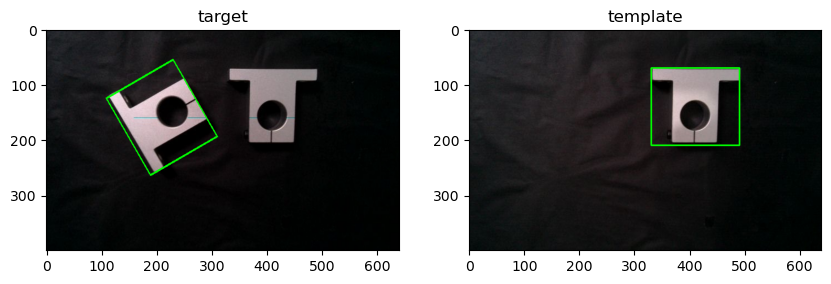

In [2]:
target_img = load_image('../data/image_1.png')
template_img = load_image('../data/template_1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

target_window = Window(210, 160, 160, 140, -120)
draw_img = draw_window(target_img, target_window)
axes[0].imshow(draw_img)
axes[0].set_title('target')

template_window = Window(410., 140., 160., 140., 0)
draw_img = draw_window(template_img, template_window)
axes[1].imshow(draw_img)
axes[1].set_title('template')

Elapsed time for calc_cnn1           : 0.0677
Elapsed time for calc_cnn2           : 0.0545


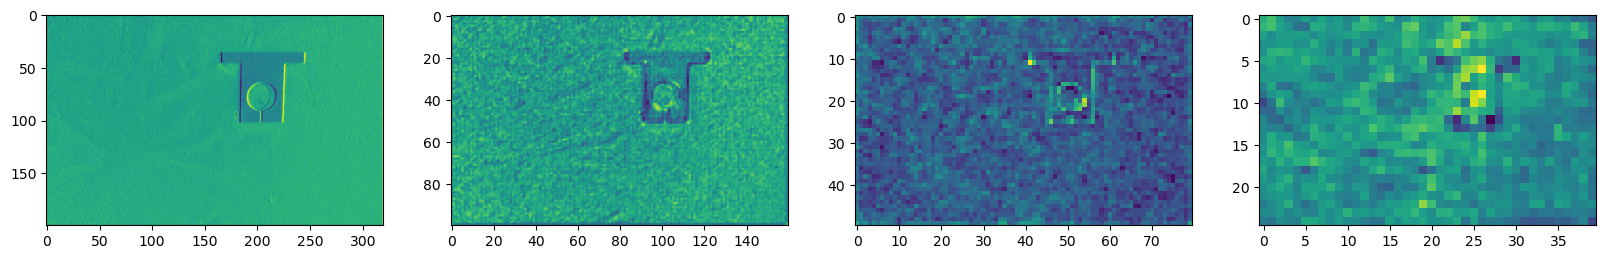

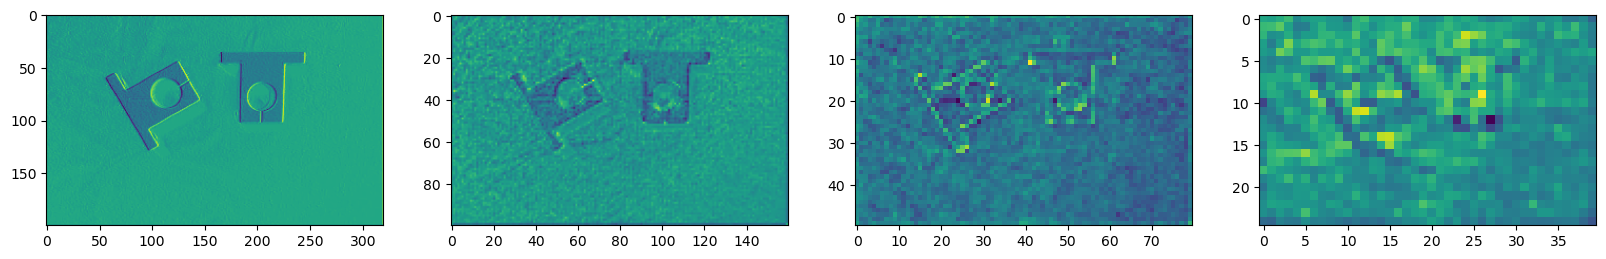

In [3]:
feature_extractor = CNN()

with timer('calc_cnn1'):
    template_feature_maps = feature_extractor(template_img)
with timer('calc_cnn2'):
    target_feature_maps = feature_extractor(target_img)

template_feature_maps.visualize()
target_feature_maps.visualize()

/opt/conda/lib/python3.7/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:80: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/IndexingUtils.h:27.)
  full_mask[mask] = norms.to(torch.uint8)


Elapsed time for calc_cnn1           : 0.1581
Elapsed time for calc_cnn2           : 0.1630


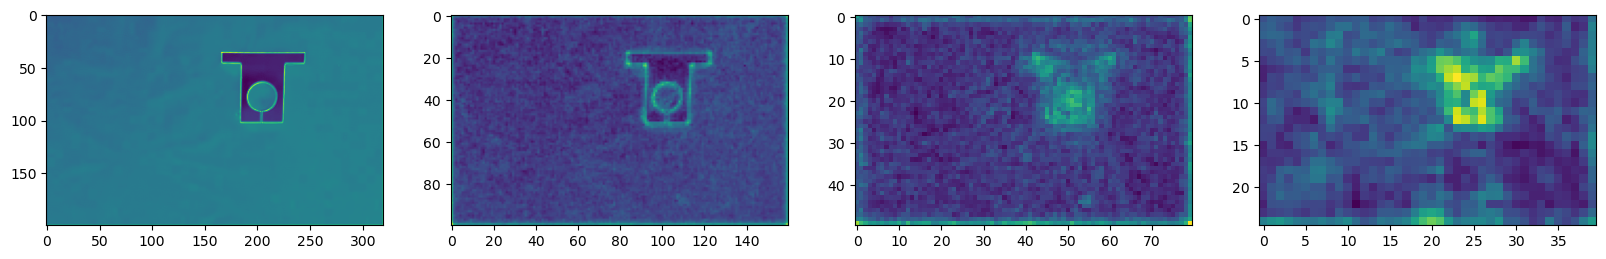

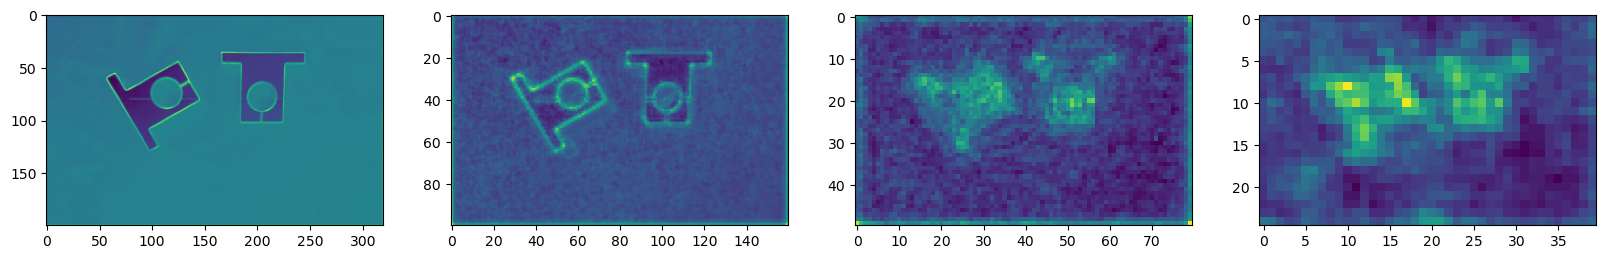

In [4]:
feature_extractor = ReCNN()

with timer('calc_cnn1'):
    template_feature_maps = feature_extractor(template_img)
with timer('calc_cnn2'):
    target_feature_maps = feature_extractor(target_img)

template_feature_maps.visualize()
target_feature_maps.visualize()